# Question: What was most valuable / effective aspect of this course?

### An Interactive Deep Dive into Survey Results: Sentiment Analysis

### Sentiment analysis involves the use of data mining, machine learning (ML), artificial intelligence and computational linguistics to mine text for sentiment and subjective information such as whether it is expressing positive, negative or neutral feelings.

### I decided to use the Machine Learning CRISP analysis approach for this survey data.

In [ ]:
from PIL import Image
img = Image.open(r"C:\\Users\\alvesd\OneDrive - smmt.co.uk\\Desktop\\Diego_work_folder\\python\\24_Sentiment_Analysis\\Crisp_Analysis_Pic.jpg")
img

# Step1 - Load the codes libraries:

In [1]:
import pandas as pd            #Pandas
from textblob import TextBlob #For Sentiment Anlysis
from itertools import islice #Will Explain Later
import matplotlib.pyplot as plt

# Step 2 - Load the data

In [2]:
#df_survey_1_to_6 = pd.read_excel("C:\\Users\\alvesd.SMMT\\OneDrive - smmt.co.uk\\Desktop\\Diego_work_folder\\python\\20_Ashlay_Data_Analysis\\Data Analysis Ashley\\Sentimental_Analysis.xlsx", sheet_name='1_to_6')

In [3]:
#df_survey_7_and_8 = pd.read_excel("C:\\Users\\alvesd.SMMT\\OneDrive - smmt.co.uk\\Desktop\\Diego_work_folder\\python\\20_Ashlay_Data_Analysis\\Data Analysis Ashley\\Sentimental_Analysis.xlsx", sheet_name='7_and_8')

In [4]:
#df_survey_9_and_10 = pd.read_excel("C:\\Users\\alvesd.SMMT\\OneDrive - smmt.co.uk\\Desktop\\Diego_work_folder\\python\\20_Ashlay_Data_Analysis\\Data Analysis Ashley\\Sentimental_Analysis.xlsx", sheet_name='9_and_10')

In [5]:
#df_survey_full= pd.read_excel("C:\\Users\\alvesd.SMMT\\OneDrive - smmt.co.uk\\Desktop\\Diego_work_folder\\python\\20_Ashlay_Data_Analysis\\Data Analysis Ashley\\Sentimental_Analysis.xlsx", sheet_name='Raw_Data')

In [6]:
df_survey_full= pd.read_excel("C:\\Users\\alvesd.SMMT\\OneDrive - smmt.co.uk\\Desktop\\Diego_work_folder\\python\\20_Ashlay_Data_Analysis\\Data Analysis Ashley\\Sentimental_Analysis.xlsx", sheet_name='Sentiment3')

# Step 3 - View the data:

In [7]:
df_survey_full.head()

,Userid,Response_1_to_10,Response_Score_Groups,Year,Quarter,Year.1,Quarter.1,Year.2,Quarter.2,What was most valuable / effective aspect of this course?
0,deshan1,8,7 & 8,2023,Qtr 2,2023,Qtr 2,2023,Qtr 2,NaN
1,deshan1,9,9 & 10,2023,Qtr 2,2023,Qtr 2,2023,Qtr 2,NaN
2,nivasi,8,7 & 8,2023,Qtr 2,2023,Qtr 2,2023,Qtr 2,NaN
3,torobi,7,7 & 8,2023,Qtr 2,2023,Qtr 2,2023,Qtr 2,NaN
4,dathom4,7,7 & 8,2023,Qtr 1,2023,Qtr 1,2023,Qtr 1,'--


In [8]:
#df_survey_1_to_6.head()

In [9]:
#df_survey_7_and_8.head()

In [10]:
#df_survey_9_and_10.head()


# First Sentiment Model: TF-IDF

## Inverse Document Frequency (TF-IDF) is a widely used statistical method in natural language processing and information retrieval. 

### - 0 will be encoded as -1 as they indicate negative sentiment
### - 1,2,3,4,5,6 will be labeled as neutral sentiment
### - 7 & 8 & 9 & 10 will be labeled as +1 as they indicate positive sentiment

In [11]:
import numpy as np

def create_sentiment(rating):
    
    if rating==0:
        return -1 # negative sentiment
    elif rating=='9 & 10'or rating=='7 & 8':
        return 1 # positive sentiment
    else:
        return 0 # neutral sentiment

#df_survey_full['Sentiment'] = df_survey_full['Any further comments you would like to add?'].apply(create_sentiment)
#df_survey_full['Sentiment1'] = df_survey_full['What could we do to improve the course in the future?'].apply(create_sentiment)
#df_survey_full['Sentiment2'] = df_survey_full['Comments'].apply(create_sentiment)
df_survey_full['Sentiment3'] = df_survey_full['What was most valuable / effective aspect of this course?'].apply(create_sentiment)

In [12]:
df_survey_full1 = df_survey_full[['Userid', 'Response_1_to_10', 'Response_Score_Groups', 'What was most valuable / effective aspect of this course?', 'Sentiment3']]

In [13]:
df_survey_full = df_survey_full1.dropna(subset=['What was most valuable / effective aspect of this course?'])

In [14]:
df_survey_full

,Userid,Response_1_to_10,Response_Score_Groups,What was most valuable / effective aspect of this course?,Sentiment3
4,dathom4,7,7 & 8,'--,0
5,kakall,9,9 & 10,'- Ability to attend the course virtually - Kn...,0
6,crwrig,6,2 & 3 & 4 & 5 & 6,..,0
7,krlind,10,9 & 10,..,0
8,dapalm,10,9 & 10,`,0
...,...,...,...,...,...
399,babedn4,10,9 & 10,Work in goups.,0
400,kakowa,10,9 & 10,"Working in groups (learning from each other), ...",0
401,cabest,9,9 & 10,Working in small groups on the activities set ...,0
402,camcgo,10,9 & 10,Workshops and feedback/discussion were engagin...,0


### Data Cleansing and remove characters: 

In [15]:
from sklearn.feature_extraction.text import re

def clean_data(review):
    
    no_punc = re.sub("[^a-zA-Z]", " ",str(review))
    no_digits = ''.join([i for i in no_punc if not i.isdigit()])
    
    return(no_digits)

In [16]:
#df_survey_full['Any further comments you would like to add?'] = df_survey_full['Any further comments you would like to add?'].apply(clean_data)
#df_survey_full['What could we do to improve the course in the future?'] = df_survey_full['What could we do to improve the course in the future?'].apply(clean_data)
#df_survey_full['Comments'] = df_survey_full['Comments'].apply(clean_data)
df_survey_full['What was most valuable / effective aspect of this course?'] = df_survey_full['What was most valuable / effective aspect of this course?'].apply(clean_data)

# Check if the cleansing worked:
#df_survey_full['Any further comments you would like to add?'][0]
#df_survey_full['What could we do to improve the course in the future?'][0]
#df_survey_full['Comments'][0]
#df_survey_full['What was most valuable / effective aspect of this course?'][0]

C:\Users\alvesd.SMMT\AppData\Local\Temp\ipykernel_22784\390621382.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_survey_full['What was most valuable / effective aspect of this course?'] = df_survey_full['What was most valuable / effective aspect of this course?'].apply(clean_data)


# Vectorize our data: What was most valuable / effective aspect of this course?
### What is vectorization? Vectorization is jargon for a classic approach of converting input data from its raw format (i.e. text ) into vectors of real numbers which is the format that ML models support.

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None, 
                        lowercase=False,
                        preprocessor=None)

X = tfidf.fit_transform(df_survey_full['What was most valuable / effective aspect of this course?'])

### Building and Evaluating the Machine Learning Model: Any further comments you would like to add?

### We can now train our algorithm on the review data to classify its sentiment into 3 categories:

### - Positive
### - Negative
### - Neutral

### First, let’s perform a train-test split: Any further comments you would like to add?

In [18]:
from sklearn.model_selection import train_test_split
y = df_survey_full['What was most valuable / effective aspect of this course?'] # target variable
X_train, X_test, y_train, y_test = train_test_split(X,y)

### Now, fit a logistic regression classifier on the training dataset and use it to make predictions on the test data: What was most valuable / effective aspect of this course?

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train) # fit the model
preds = lr.predict(X_test) # make predictions

### The first model has an accuracy of approximately: What was most valuable / effective aspect of this course?

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(preds,y_test) 

0.1414141414141414

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk 

%matplotlib inline
sns.set_style('ticks')

import warnings
warnings.filterwarnings('ignore')

### Split the data: What was most valuable / effective aspect of this course?

In [22]:
df_survey_full_comments = df_survey_full[['What was most valuable / effective aspect of this course?', 'Sentiment3']]

In [23]:
df_survey_full_comments

,What was most valuable / effective aspect of this course?,Sentiment3
4,,0
5,Ability to attend the course virtually Kn...,0
6,,0
7,,0
8,,0
...,...,...
399,Work in goups,0
400,Working in groups learning from each other ...,0
401,Working in small groups on the activities set ...,0
402,Workshops and feedback discussion were engagin...,0


### Check the rows with Positive, Neutral, and Negative results: What was most valuable / effective aspect of this course?

In [24]:
df_survey_full_comments['Sentiment3'].value_counts()
# 1 - Positive
# 0 - Neutral
# -1 - Negative

0    395
Name: Sentiment3, dtype: int64

### Look for Null Values:

In [25]:
df_survey_full_comments.isnull().sum()

What was most valuable / effective aspect of this course?    0
Sentiment3                                                   0
dtype: int64

### Read in Data and NLTK Basics

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [27]:
#df_survey_full.head()

### Plot the results: Sentiment

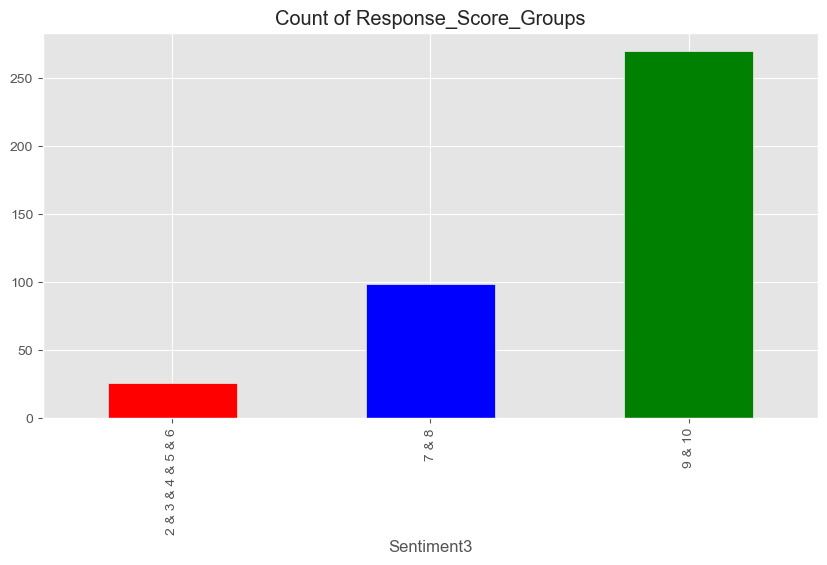

In [28]:
ax = df_survey_full['Response_Score_Groups'].value_counts().sort_index() \
    .plot(kind='bar',
          color=["red", "blue", "green"],
          title='Count of Response_Score_Groups',
          figsize=(10, 5))
ax.set_xlabel('Sentiment3')
plt.show()

### Check NLTK model accuracy: What was most valuable / effective aspect of this course?

In [29]:
example = df_survey_full['What was most valuable / effective aspect of this course?'][50]
print(example)

Comparison between the old and the new version


In [30]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Comparison', 'between', 'the', 'old', 'and', 'the', 'new', 'version']

In [31]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Comparison', 'NNP'),
 ('between', 'IN'),
 ('the', 'DT'),
 ('old', 'JJ'),
 ('and', 'CC'),
 ('the', 'DT'),
 ('new', 'JJ'),
 ('version', 'NN')]

In [32]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (ORGANIZATION Comparison/NNP)
  between/IN
  the/DT
  old/JJ
  and/CC
  the/DT
  new/JJ
  version/NN)


# Second Model: VADER Sentiment Scoring

In [33]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

### Check VADER Model Efficiency:

In [34]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [35]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [36]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [37]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df_survey_full.iterrows(), total=len(df_survey_full)):
    text = row['What was most valuable / effective aspect of this course?']
    myid = row['Userid']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/395 [00:00<?, ?it/s]

In [38]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Userid'})
vaders = vaders.merge(df_survey_full, how='left')

## Add a sentiment columns neg, neu, and pos.

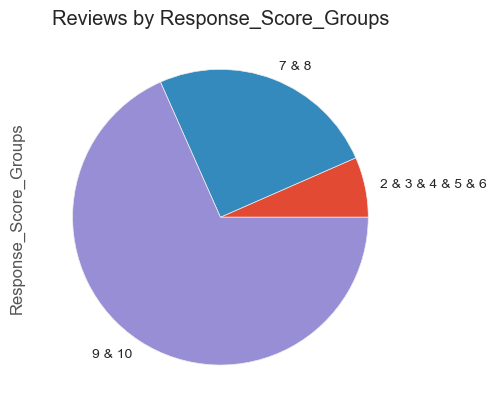

In [39]:
#Plotting Pie chart
plt=df_survey_full['Response_Score_Groups'].value_counts().sort_index().plot(kind='pie', 
                                                title="Reviews by Response_Score_Groups")
plt.plot();

### Let’s have an analysis of how many survey reviews there are for each Response_Score_Groups:

In [40]:
df_survey_full['Response_Score_Groups'].value_counts()

9 & 10               270
7 & 8                 99
2 & 3 & 4 & 5 & 6     26
Name: Response_Score_Groups, dtype: int64

### Plot the scores by Response Score Groups: What was most valuable / effective aspect of this course?

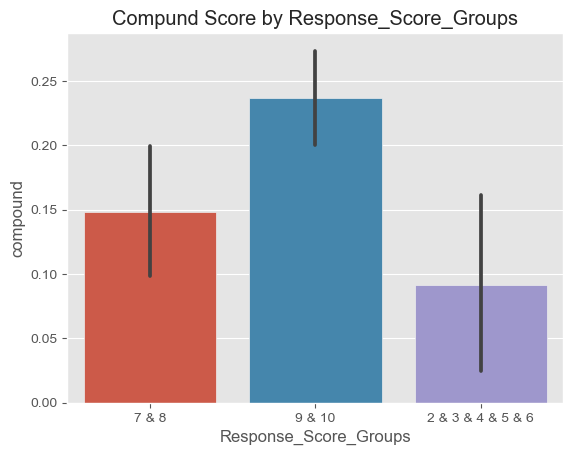

In [41]:
import matplotlib.pyplot as plt
ax = sns.barplot(data=vaders, x='Response_Score_Groups', y='compound')
ax.set_title('Compund Score by Response_Score_Groups')
plt.show()

### Plot the scores by Sentiment in each Response Score Groups: What was most valuable / effective aspect of this course?

### The barplots seem to be logical. Especially, when I look at the positive score vs Survey score, I see that score 1 has the lowest positive score as it should be and vice versa for negative score.

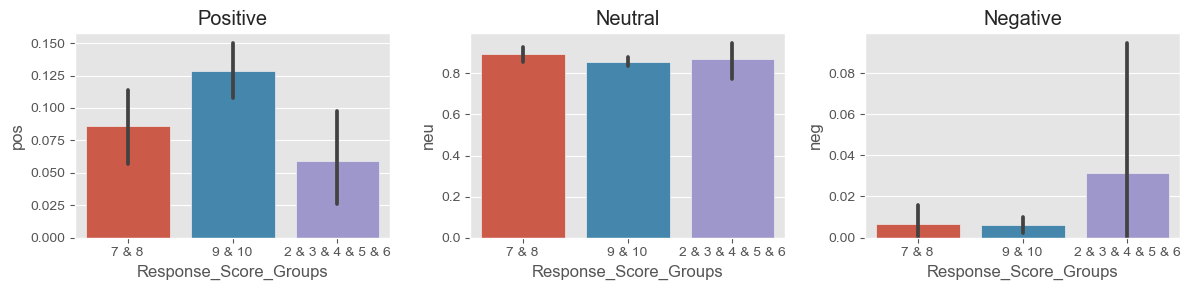

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Response_Score_Groups', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Response_Score_Groups', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Response_Score_Groups', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Third Model: Roberta Pretrained Model¶

### Use a model trained of a large corpus of data.
### Transformer model accounts for the words but also the context related to other words.

In [43]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import torch

In [44]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

### Check Roberta Pretrained Model Efficiency:

In [45]:
# VADER results on example
print(example)
sia.polarity_scores(example)

Comparison between the old and the new version


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

### Define the scores: neg, neu, and pos

In [46]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.051079396, 'roberta_neu': 0.8880388, 'roberta_pos': 0.06088182}


In [47]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

### It is possible to analyse the percentage of information collected:

In [48]:
res = {}
for i, row in tqdm(df_survey_full.iterrows(), total=len(df_survey_full)):
    try:
        text = row['What was most valuable / effective aspect of this course?']
        myid = row['Userid']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/395 [00:00<?, ?it/s]

In [49]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Userid'})
results_df = results_df.merge(df_survey_full, how='left')

In [50]:
results_df.columns

Index(['Userid', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Response_1_to_10',
       'Response_Score_Groups',
       'What was most valuable / effective aspect of this course?',
       'Sentiment3'],
      dtype='object')

In [51]:
results_df

,Userid,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Response_1_to_10,Response_Score_Groups,What was most valuable / effective aspect of this course?,Sentiment3
0,dathom4,0.0,0.000,0.000,0.0000,0.221789,0.575706,0.202505,7,7 & 8,,0
1,kakall,0.0,0.753,0.247,0.3182,0.013415,0.563970,0.422615,9,9 & 10,Ability to attend the course virtually Kn...,0
2,crwrig,0.0,0.000,0.000,0.0000,0.223829,0.549837,0.226334,6,2 & 3 & 4 & 5 & 6,,0
3,krlind,0.0,0.000,0.000,0.0000,0.223829,0.549837,0.226334,10,9 & 10,,0
4,dapalm,0.0,0.000,0.000,0.0000,0.228123,0.505880,0.265997,10,9 & 10,,0
...,...,...,...,...,...,...,...,...,...,...,...,...
390,deshan1,0.0,0.633,0.367,0.4404,0.039121,0.527095,0.433784,8,7 & 8,Way better understanding of the process,0
391,deshan1,0.0,0.633,0.367,0.4404,0.039121,0.527095,0.433784,9,9 & 10,Way better understanding of the process,0
392,babedn4,0.0,1.000,0.000,0.0000,0.183153,0.708311,0.108537,10,9 & 10,Work in goups,0
393,kakowa,0.0,1.000,0.000,0.0000,0.010681,0.603821,0.385498,10,9 & 10,Working in groups learning from each other ...,0


## Comparison of RobertA and VADER:
### I will use pairplot from the seaborn library to visualize the relationsship between two variables, which are sentiment scores from both RobertA and VADER.

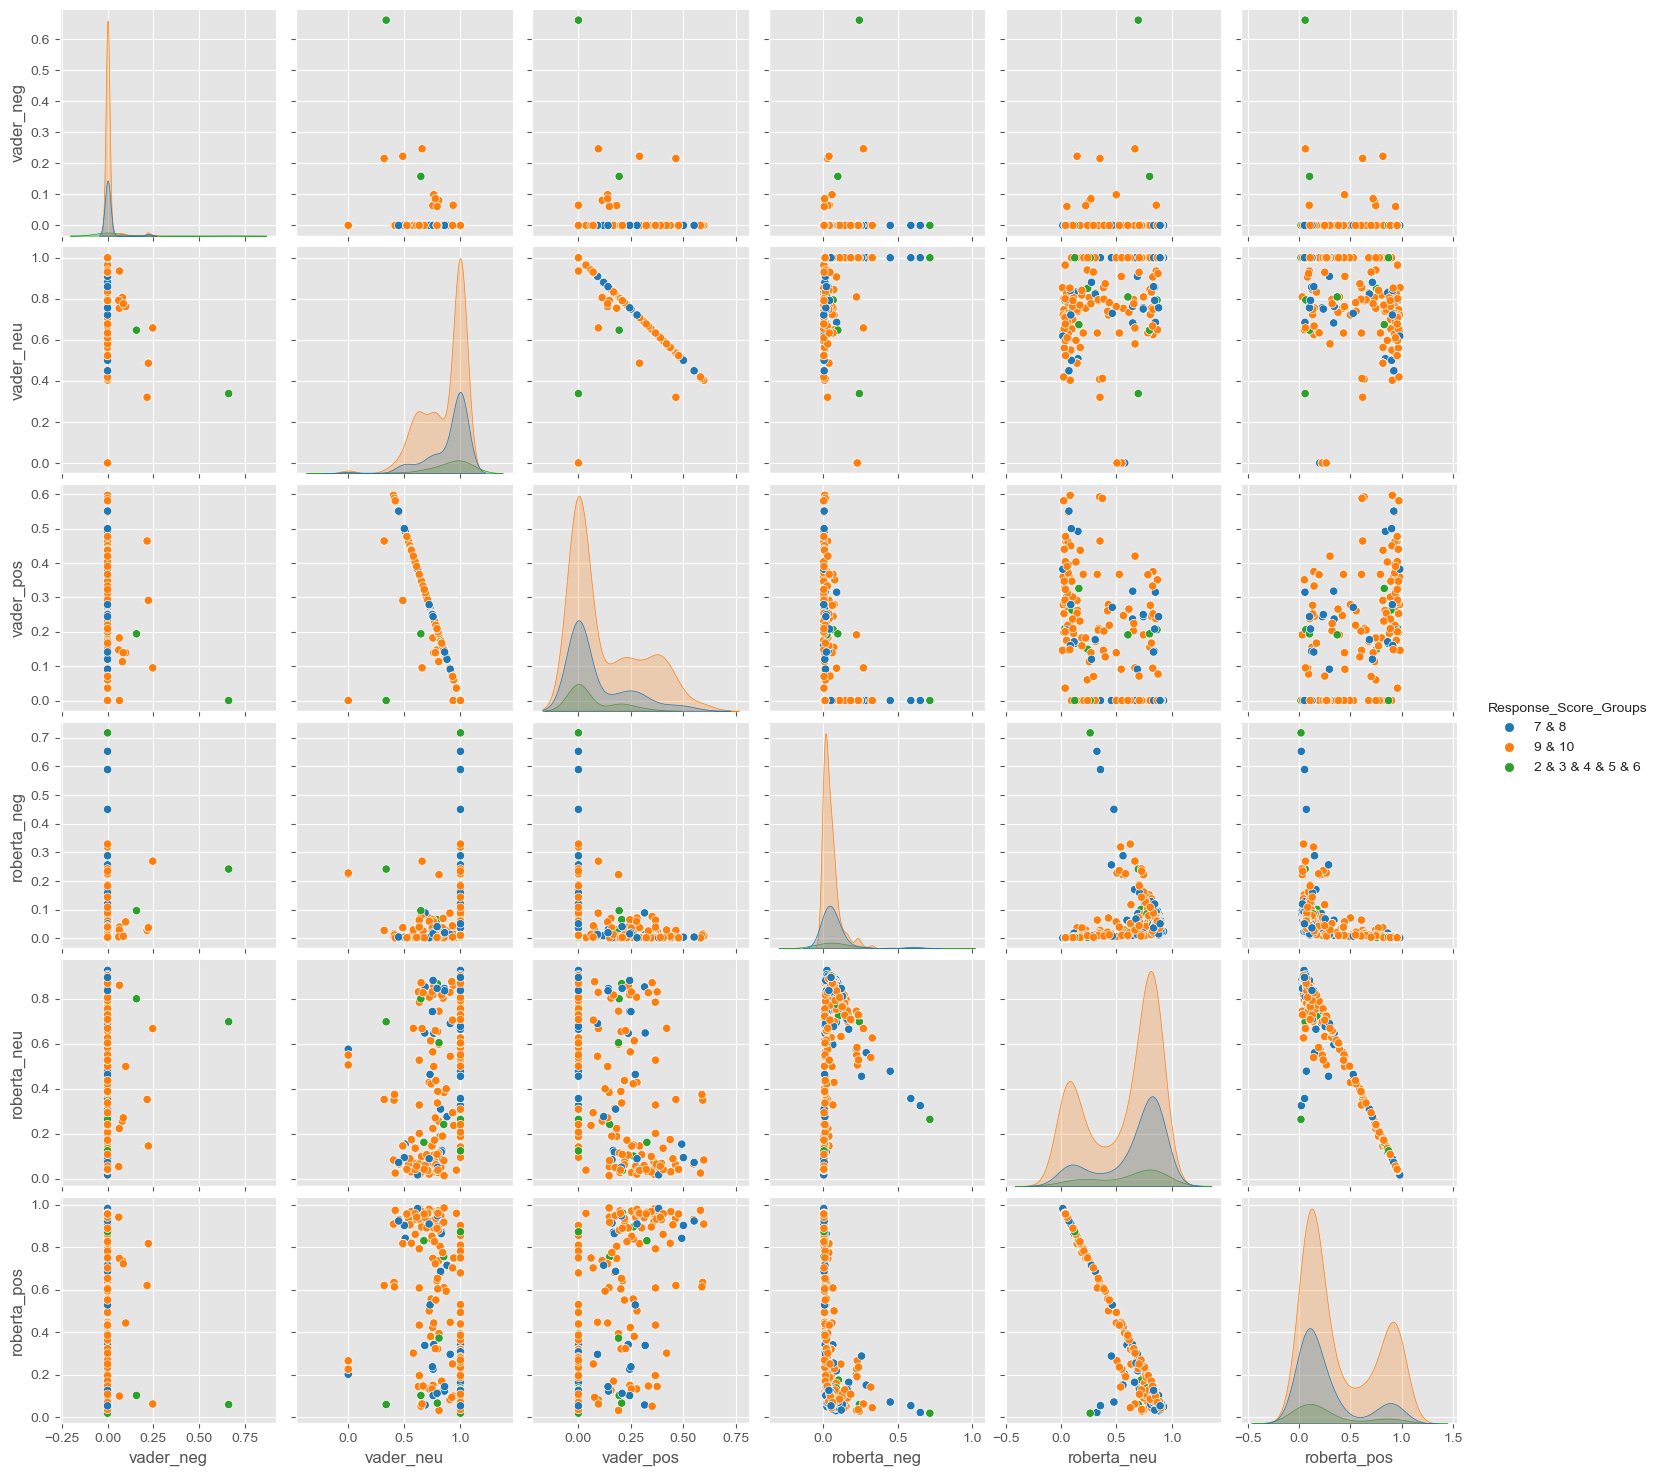

In [52]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Response_Score_Groups',
            palette='tab10')
plt.show()

### When I look at the plots, we can make an overall prediction about the performance of RobertA and VADER: RobertA seems to cluster scores better compared to VADER.

### Now, I will try to determine the most confusing sentiments for each, RobertA and VADER for "Response_1_to_10": 0 and 10.

### Test both models: Positive sentiment with 2 star view.

In [53]:
results_df.query('Response_1_to_10 == 2') \
    .sort_values('roberta_pos', ascending=False)['What was most valuable / effective aspect of this course?'].values[0]

'To have connect with people from different companies'

In [54]:
results_df.query('Response_1_to_10 == 2') \
    .sort_values('vader_pos', ascending=False)['What was most valuable / effective aspect of this course?'].values[0]

'being able to tell customers that i ve attended the course '

### Test both models: Negative sentiment with 10 star view.

In [55]:
results_df.query('Response_1_to_10 == 10') \
    .sort_values('roberta_neg', ascending=False)['What was most valuable / effective aspect of this course?'].values[0]

'The time taking to explain every piece of information'

In [56]:
results_df.query('Response_1_to_10 == 10') \
    .sort_values('vader_neg', ascending=False)['What was most valuable / effective aspect of this course?'].values[0]

'Had no previous knowledge of PAPP requirements documents  This has been very informative and given me the guidance to hopefully succeed in my new roll '

## Word Cloud

### A collection of words presented in different sizes is called a word cloud. A word is more frequently used and considered to be of more importance when it is larger and bolded inside a text.

### Let’s plot the word cloud for a text in our dataset.

In [57]:
from wordcloud import WordCloud 

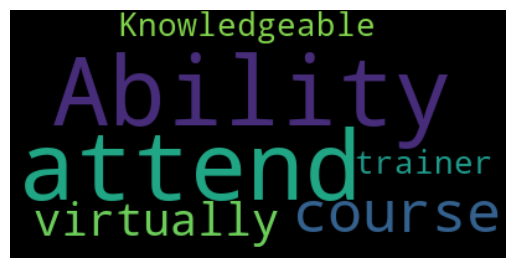

In [58]:
text = results_df['What was most valuable / effective aspect of this course?'][1]

# Create a word cloud image:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [59]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

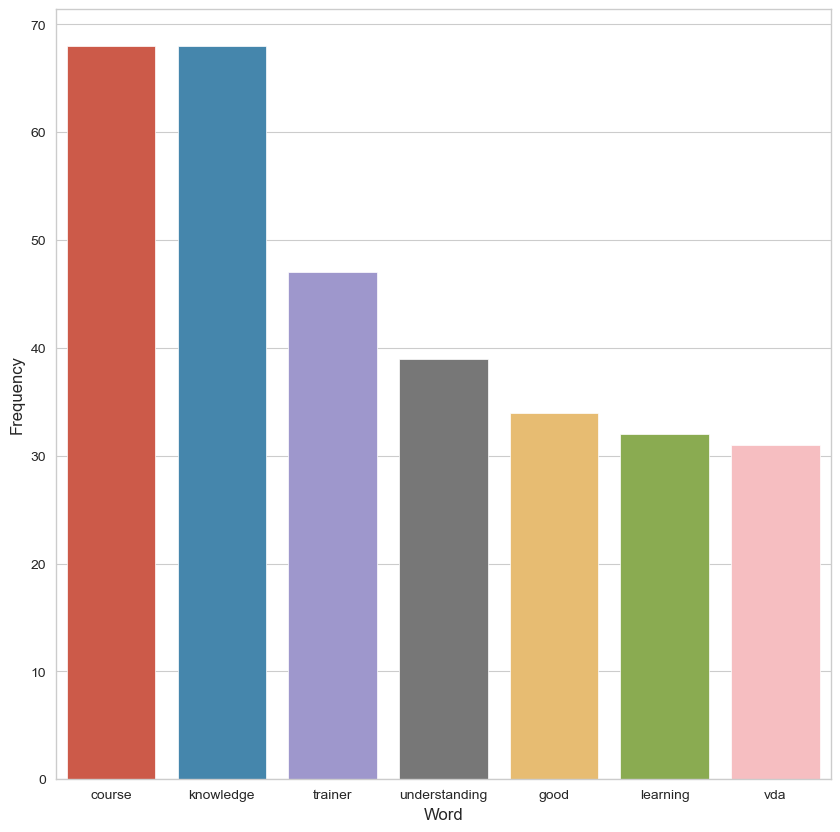

In [61]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = results_df['What was most valuable / effective aspect of this course?'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

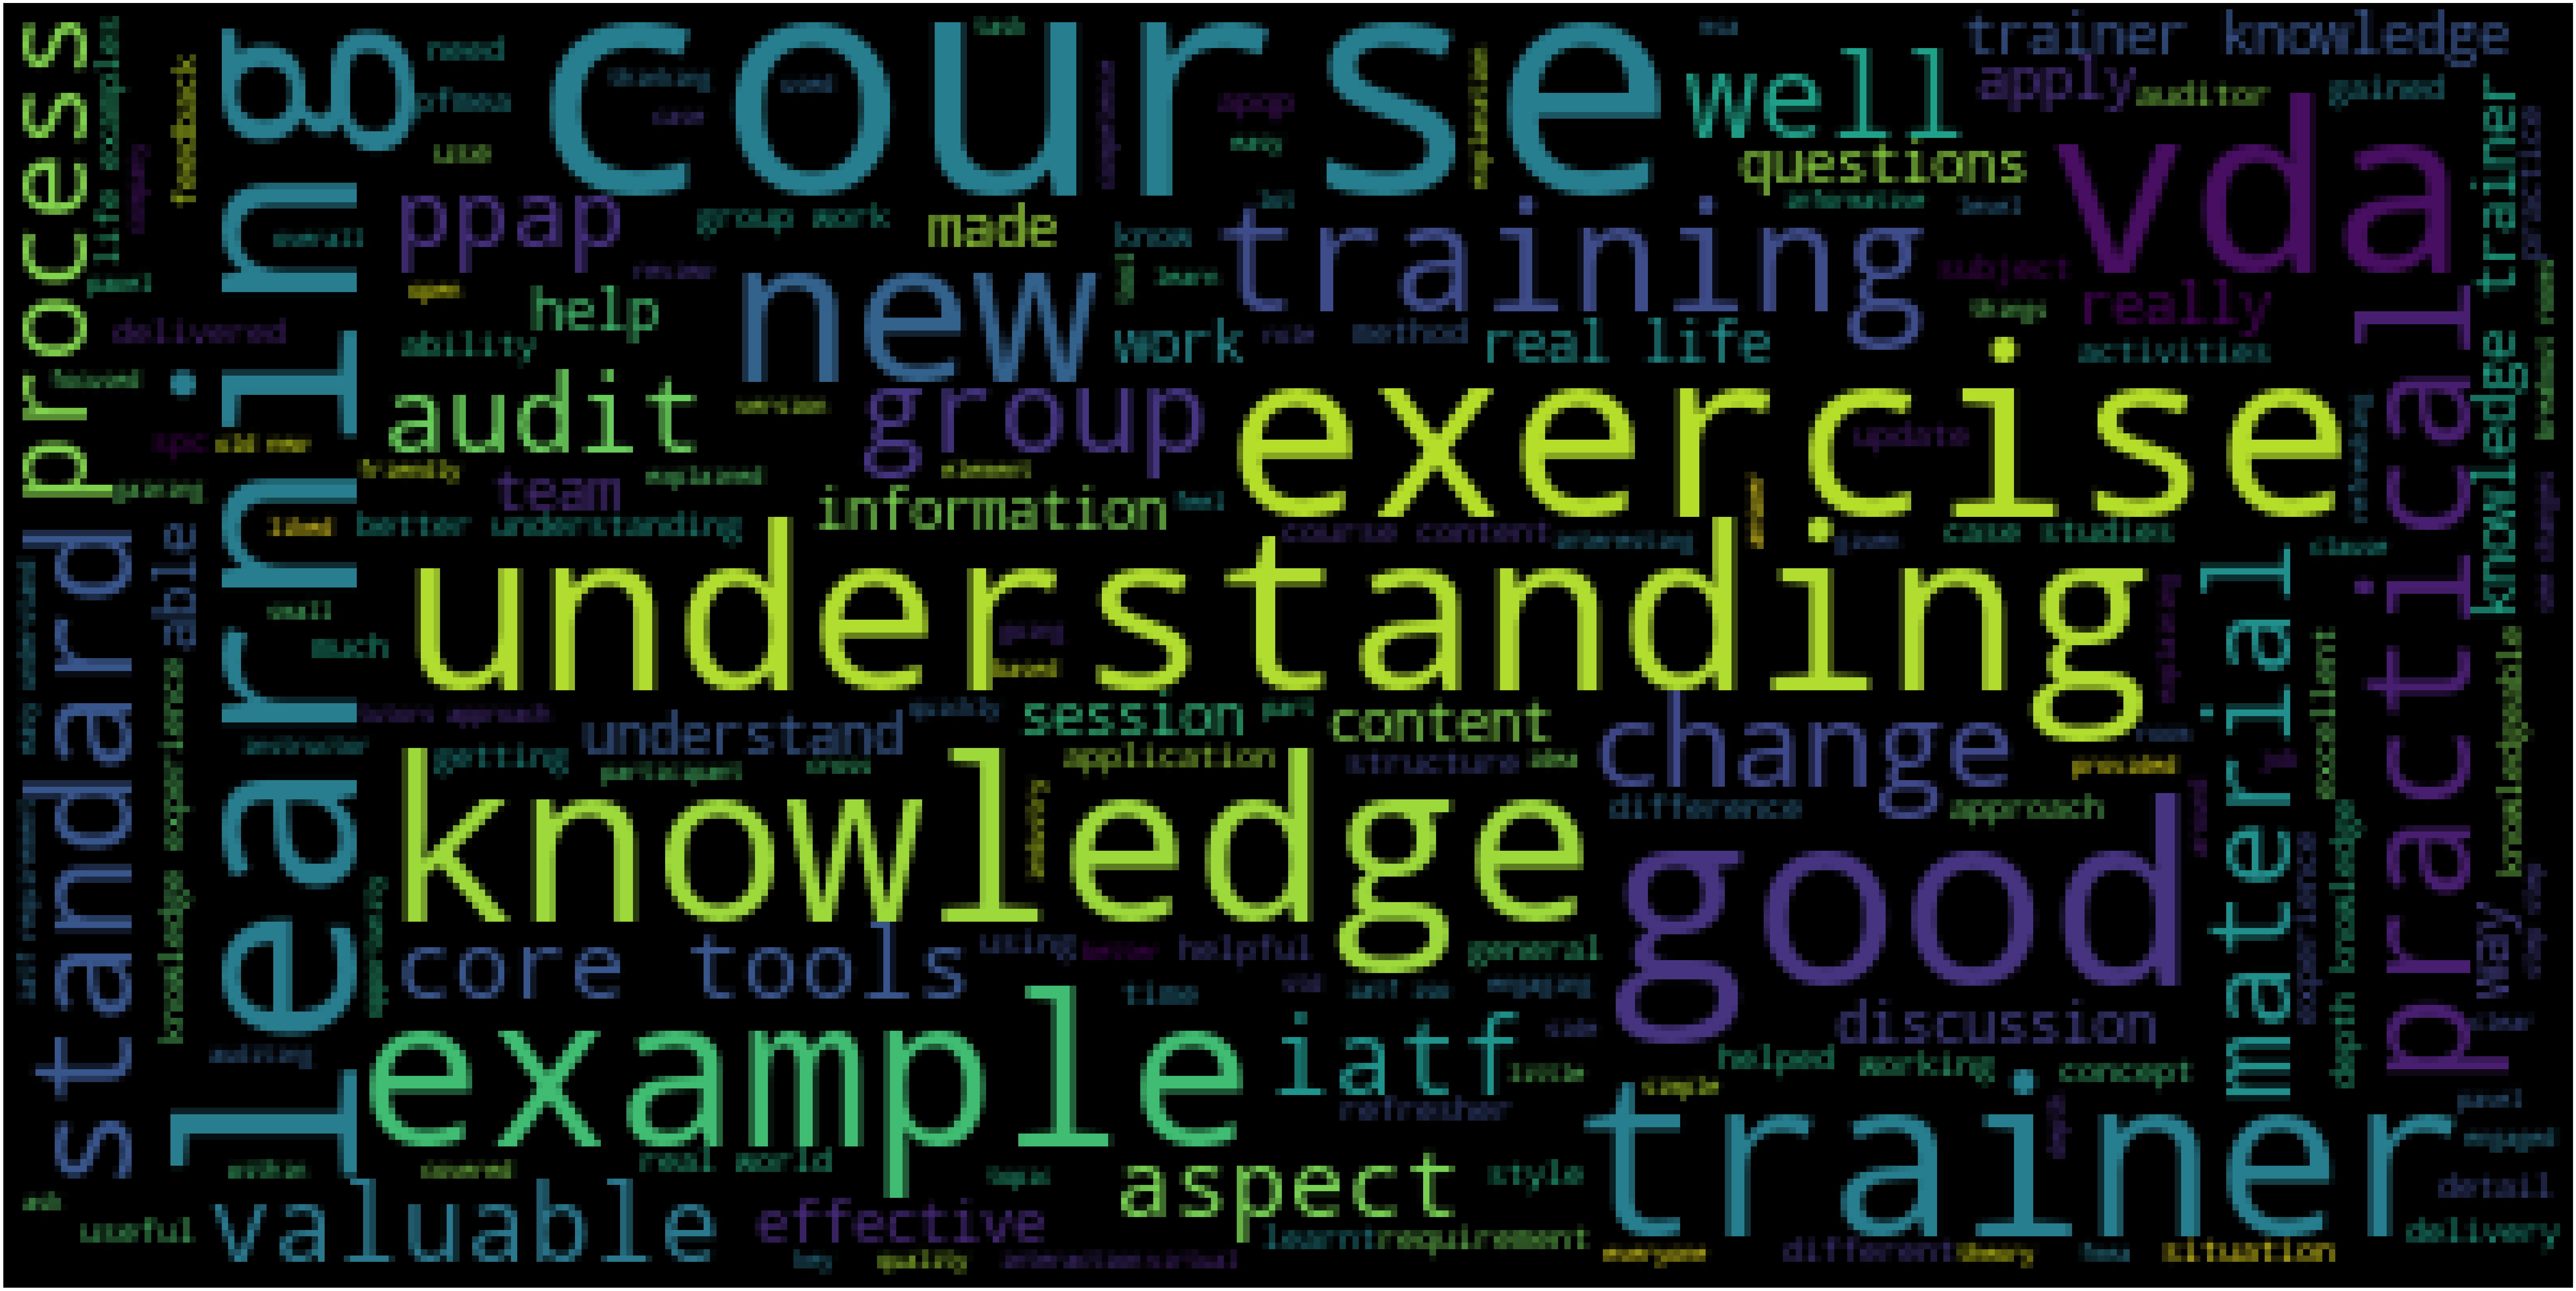

In [62]:
wc(cleaned_data_title,'black','Common Words')

# End